# 와인 분류 문제(레드/화이트 와인)
- 📝 Tistory: https://heytech.tistory.com/
- 💻 Github: https://github.com/park-gb/

# 라이브러리 import

In [1]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리

In [2]:
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리

In [3]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

# 데이터 불러오기

In [4]:
# 레드 와인데이터셋 불러오기
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
# 화이트 와인데이터셋 불러오기
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 목표변수 라벨링

In [7]:
# 레드 와인은 target을 0으로, 화이트 와인은 1로 초기화
red['target'] = 0
white['target'] = 1

In [8]:
# 데이터셋 저장
red.to_csv('../dataset/red_raw.csv')
white.to_csv('../dataset/white_raw.csv')

# 데이터 결합

In [9]:
# 레드 와인, 화이트 와인 데이터셋 병합
df = pd.concat([red, white], axis = 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [10]:
df.to_csv('../dataset/wine_combined_raw.csv')

In [11]:
# 화이트 와인이 레드와인에 약 3배 더 많음
df.target.value_counts(normalize=True)

1    0.753886
0    0.246114
Name: target, dtype: float64

# 데이터 전처리

## 불필요한 변수 1차 제거

In [12]:
# 일반적으로 와인 퀄리티가 와인의 종류를 구분하지 않기 때문에 quality 변수 제거
df = df.drop(['quality'], axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## 결측치 처리

In [13]:
df.isnull().sum() # 결측치 미존재

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

## 이상치 처리

In [14]:
# 설명변수만 선택(목표변수만 제외)
x = df[df.columns.difference(['target'])]
feature_num = len(x.columns)
print(f"설명변수(feature) 개수: {feature_num}")

설명변수(feature) 개수: 11


### Boxplot을 활용한 이상치 확인

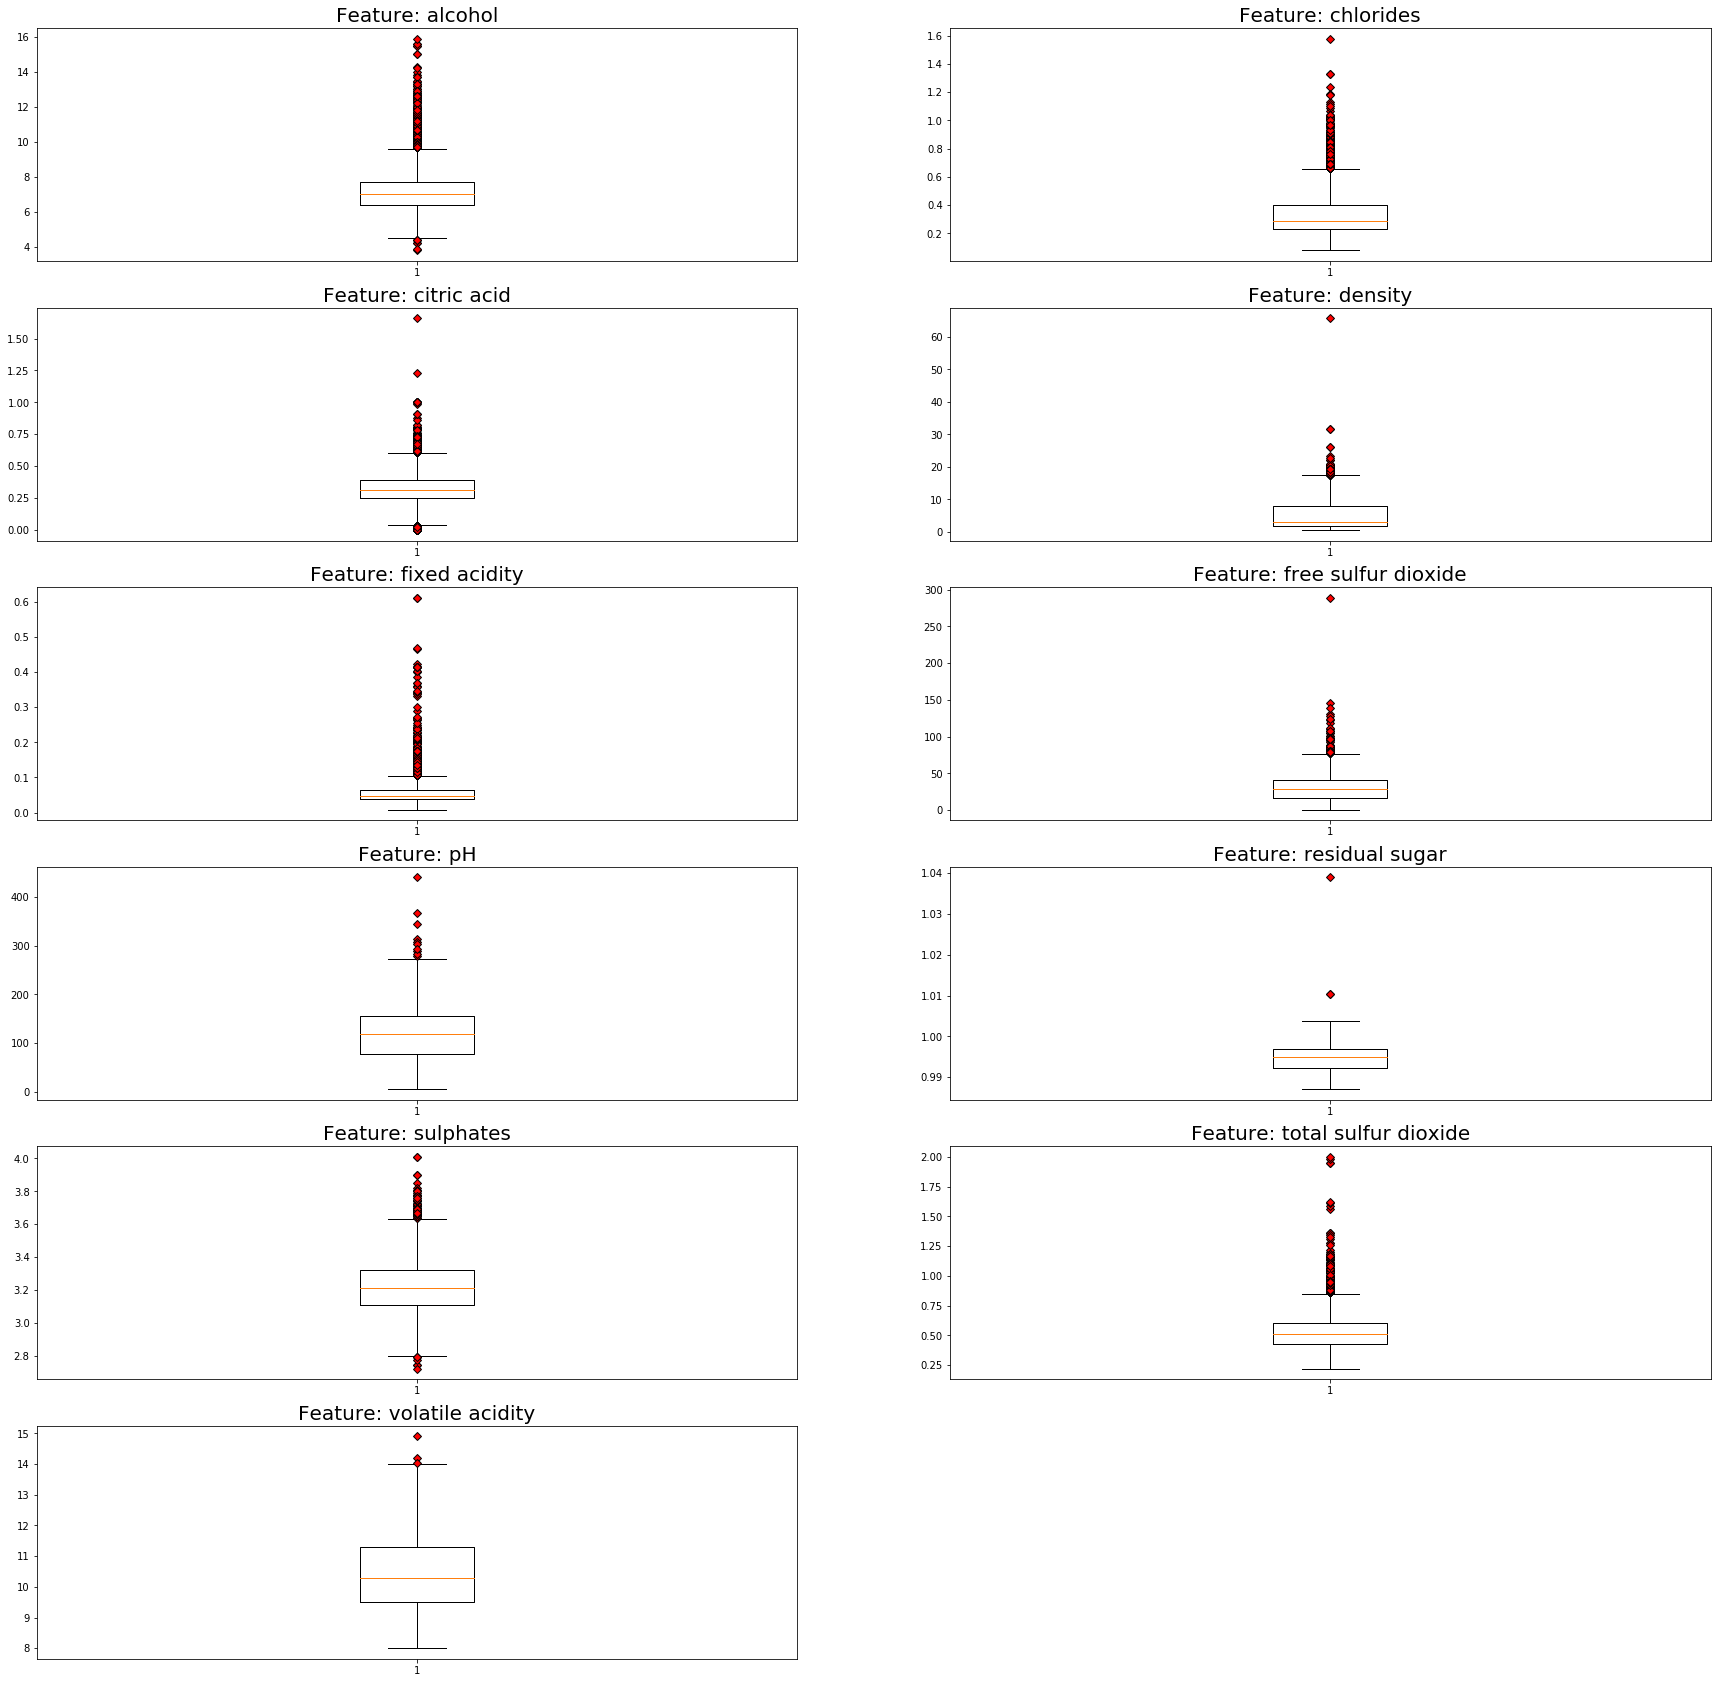

In [15]:
plt.figure(figsize=(30, 30))
for col_idx in range(feature_num):
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
    plt.subplot(6, 2, col_idx+1)
    # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
    plt.boxplot(df[df.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
    # 그래프 타이틀: feature name
    plt.title("Feature: "+ x.columns[col_idx], fontsize = 20)
plt.show()

### 사분위수 범위(IQR) 기반 이상치 제거

In [16]:
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위수
    q3 = input_data.quantile(0.75) # 제 3사분위수
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    lower_bound = q1 - (iqr * 1.5) # IQR 최솟값
    upper_bound = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outlier = input_data[(lower_bound < input_data) & (input_data < upper_bound)]
    return df_removed_outlier

In [17]:
# 이상치 제거한 데이터셋
df_prep = remove_outlier(x)

In [18]:
# 목표변수 할당
df_prep['target'] = df.target

In [19]:
# 결측치(이상치 처리된 데이터) 확인
df_prep.isnull().sum()

alcohol                   3
chlorides               286
citric acid             509
density                   3
fixed acidity           357
free sulfur dioxide      67
pH                       73
residual sugar          118
sulphates               191
total sulfur dioxide     10
volatile acidity        387
target                    0
dtype: int64

In [20]:
# 이상치 포함 데이터(이상치 처리 후 NaN) 삭제
df_prep.dropna(axis = 0, how = 'any', inplace = True)
print(f"이상치 포함된 데이터 비율: {round((len(df) - len(df_prep))*100/len(df), 2)}%")

이상치 포함된 데이터 비율: 22.76%


In [21]:
# 레드와인, 화이트와인 비율
df_prep.target.value_counts(normalize=True)

1    0.863691
0    0.136309
Name: target, dtype: float64

In [22]:
# 전처리한 로컬에 데이터셋 저장
df_prep.to_csv('../dataset/wine_combined_prep.csv')

## 설명변수별 목표변수와의 관계 시각화
- 목표변수의 클래스를 두드러지게 구분짓는 설명변수 확인

In [23]:
# 설명변수명 리스트
x = df_prep[df_prep.columns.difference(['target'])]
feature_name = x.columns

### 설병변수 값에 따른 목표변수 클래스 시각화

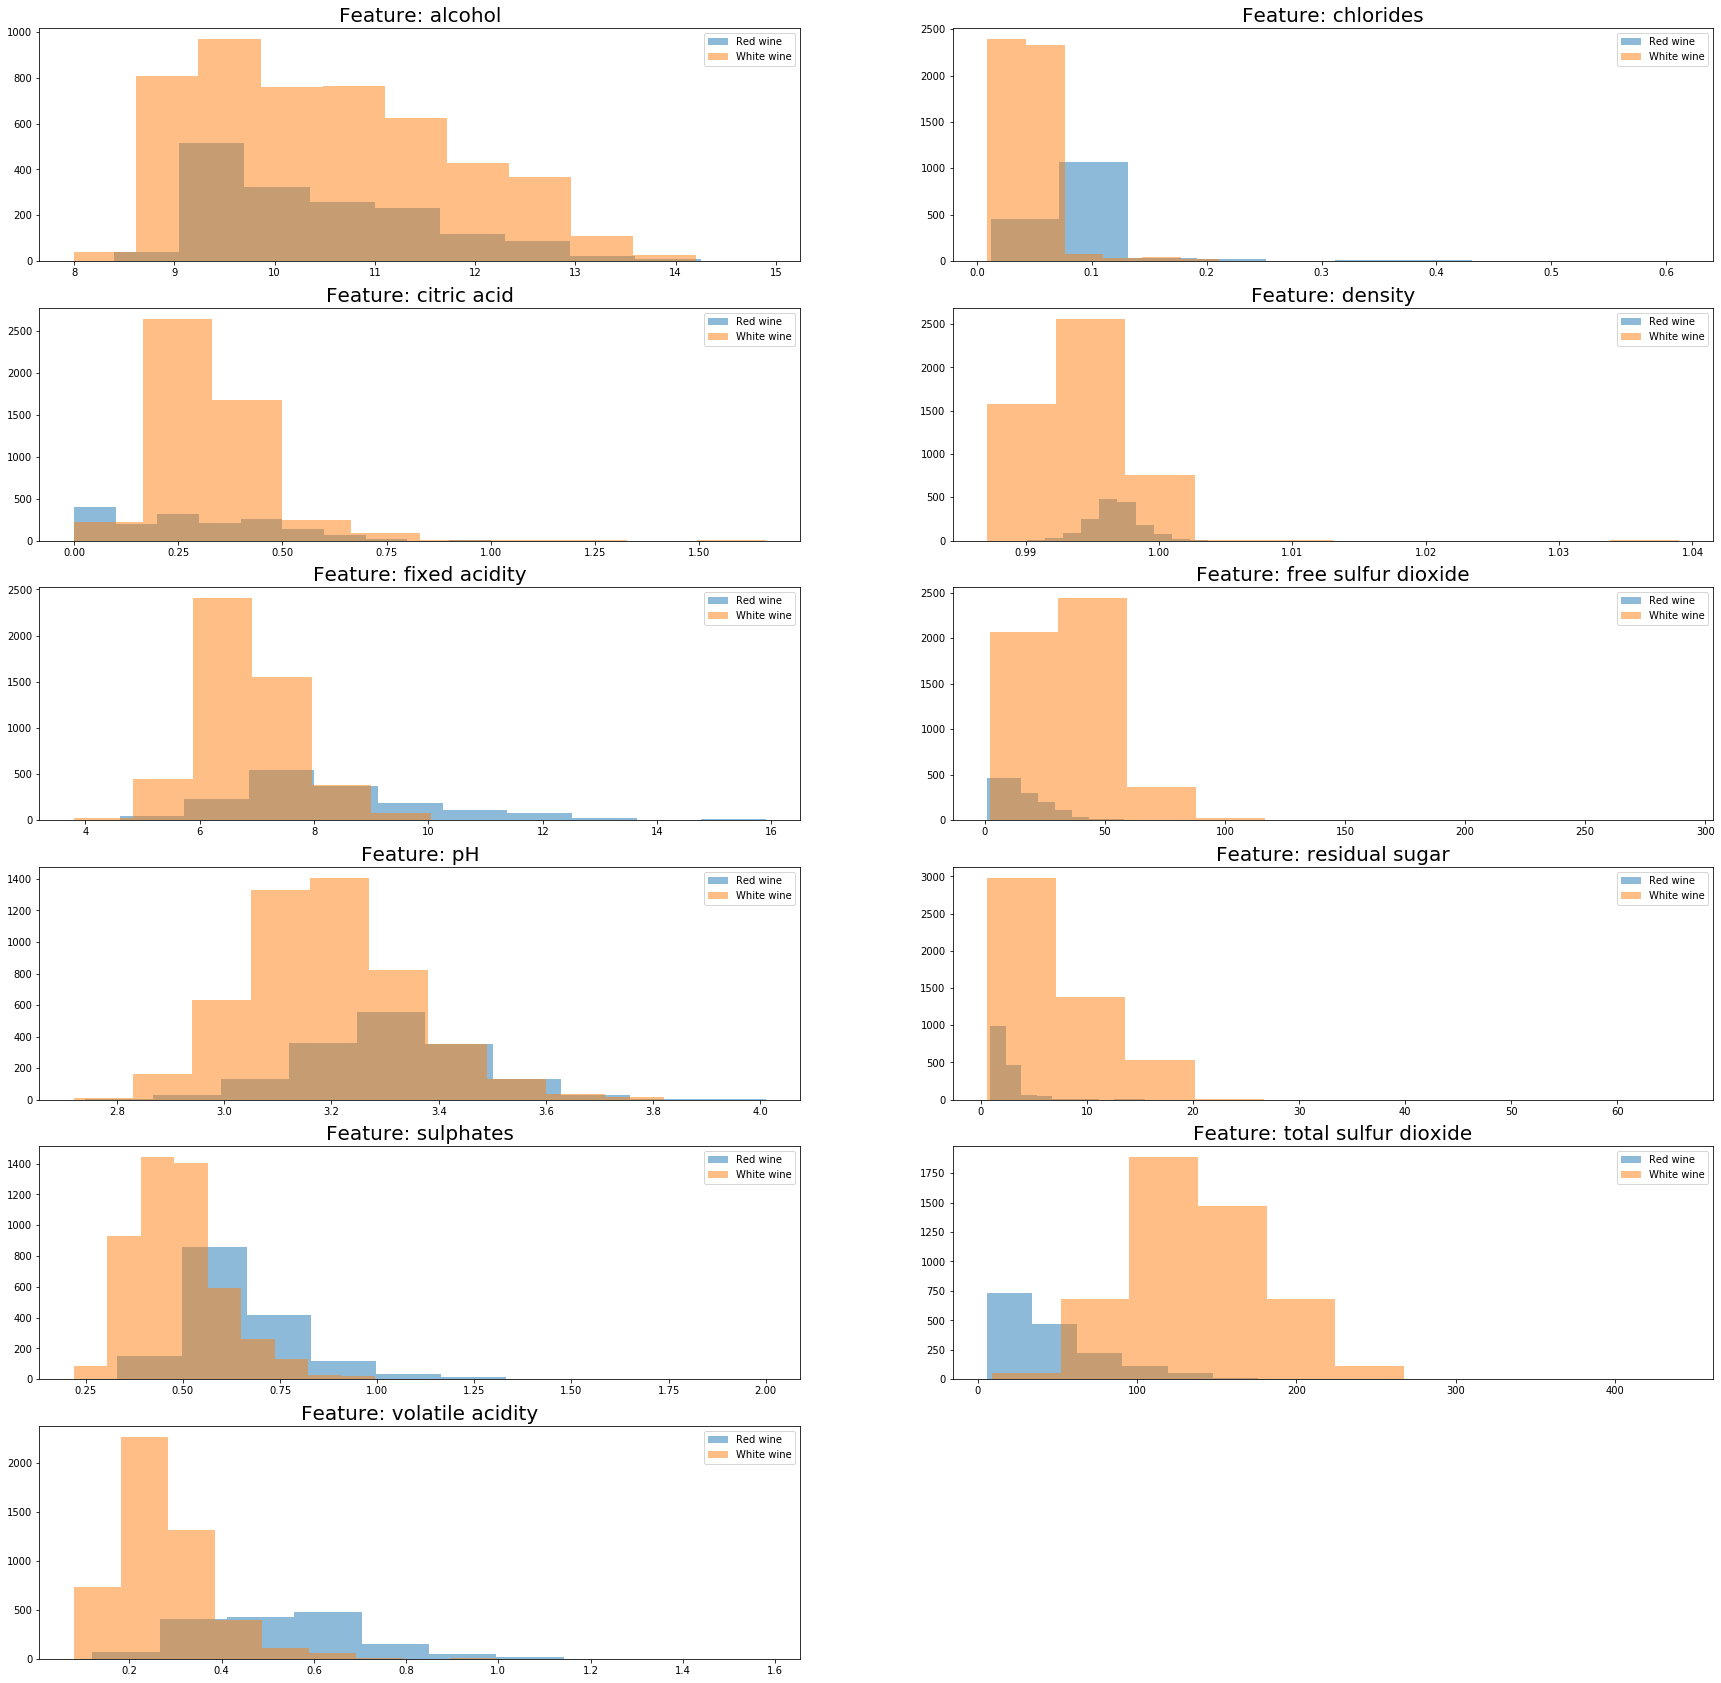

In [24]:
plt.figure(figsize=(30, 30))
for col_idx in range(feature_num):
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
    plt.subplot(6, 2, col_idx+1)
    # 
    plt.hist(df[df["target"] == 0][feature_name[col_idx]], label = "Red wine", alpha = 0.5)
    plt.hist(df[df["target"] == 1][feature_name[col_idx]], label = "White wine", alpha = 0.5)
    plt.legend()
    # 그래프 타이틀: feature name
    plt.title("Feature: "+ feature_name[col_idx], fontsize = 20)
plt.show()

### 해석
- alcohol(알코올) 값에 따른 와인 분류 추이가 비슷한 것으로 보아 alcohol 변수가 클래스를 구분짓는 중요 변수는 아닌 것으로 보임
- 반면, 다음과 같은 변수는 클래스에 따라 설명변수 값의 분포가 다른 것으로 보아 클래스를 구분짓는 중요 변수인 것으로 보임
- chlorides(염화물), density(밀도), free sulfur dioxide(독립 이산화황), residual sugar(잔당: 발효 후 와인 속에 남아있는 당분), sulphates(황산염), total sulfur dioxide(총 이산화황), violatitle acidity(휘발성산)

## 데이터 정규화

In [25]:
# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()
# 목표변수
y = df_prep['target']
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

# 데이터 분리

In [26]:
# 학습, 테스트 데이터셋 7:3 비율로 분리
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 123)

In [27]:
# 훈련 데이터 내 와인별 비율
y_train.value_counts(normalize=True)

1    0.860763
0    0.139237
Name: target, dtype: float64

In [28]:
# 테스트 데이터 내 와인별 비율
y_test.value_counts(normalize=True)

1    0.870518
0    0.129482
Name: target, dtype: float64

# Classifier 모델링 함수

## 기본 모델 학습 함수

In [29]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

## 하이퍼파라미터별 모델 성능 시각화 함수

In [30]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('../figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

## 모델 최적화 함수: 학습할 트리 모델 개수 선정

In [31]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 3))

## 모델 최적화 함수: 최대 깊이 선정

In [32]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 3))

## 모델 최적화 함수: 분리 노드의 최소 자료 수 선정

In [33]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 3))

## 모델 최적화 함수: 잎사귀 노드의 최소 자료 수 선정

In [34]:
# min_samples_leaf: 잎사귀 최소 자료 수
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 3))

## 최종 모델 학습

In [35]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = '../model/'
    model_filename = 'wine_classification_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

# Random Forest Classifier 기반 분류 모델 성능 평가

In [36]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'RFC'

## 기본 모델 학습

In [37]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 0.999
테스트 데이터셋 정확도: 0.995


### 해석

- 학습 데이터를 기반으로 학습한 분류 모델의 정확도가 약 100%인 것으로 미루어 보아 과대적합이 발생한 것으로 보임
- 하이퍼파라미터 튜닝을 통해 과대적합을 방지할 수 있도록 조치가 필요함

## 모델 최적화: (1) 학습할 트리 개수 선정

    n_estimators  TrainScore  TestScore
0              5       0.998      0.995
1             10       0.999      0.997
2             15       0.999      0.995
3             20       0.999      0.995
4             25       0.999      0.995
5             30       0.999      0.996
6             35       0.999      0.995
7             40       0.999      0.995
8             45       0.999      0.995
9             50       0.999      0.995
10            55       0.999      0.996
11            60       0.999      0.997
12            65       0.999      0.997
13            70       0.999      0.996
14            75       0.999      0.996
15            80       0.999      0.995
16            85       0.999      0.995
17            90       0.999      0.995
18            95       0.999      0.995
19           100       0.999      0.995
20           105       0.999      0.995
21           110       0.999      0.995
22           115       0.999      0.995
23           120       0.999      0.995


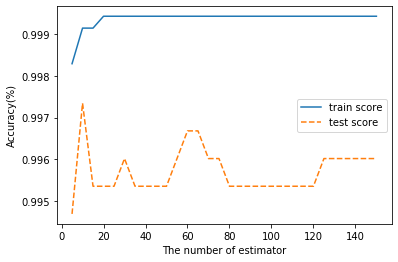

In [38]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max)

### 해석
- 학습 데이터에서 정확도가 100%에 가깝게 나타난 것으로 보아 과대적합 발생한 것으로 보임
- 트리개수가 적을수록 과대적합 방지가 용이함
- 테스트 데이터셋에서 모델 성능이 증가하다가 감소하기 직전의 트리 개수를 최적의 파라미터로 선정

In [39]:
n_estimator = 10

## 모델 최적화: (2) 최대 깊이

    depth  TrainScore  TestScore
0       1       0.905      0.902
1       2       0.970      0.976
2       3       0.985      0.985
3       4       0.991      0.989
4       5       0.995      0.994
5       6       0.995      0.994
6       7       0.997      0.995
7       8       0.999      0.994
8       9       0.999      0.995
9      10       0.999      0.995
10     11       0.999      0.995
11     12       0.999      0.997
12     13       0.999      0.997
13     14       0.999      0.997
14     15       0.999      0.997
15     16       0.999      0.997
16     17       0.999      0.997
17     18       0.999      0.997
18     19       0.999      0.997
19     20       0.999      0.997


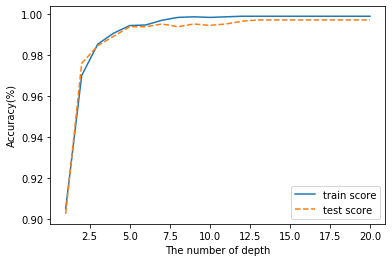

In [40]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator)

### 해석
- 학습 데이터셋 기반 정확도와 테스트 데이터셋 기반 정확도 간의 차이가 적은 depth 선정
- 최대 깊이는 적을수록 과대적합 방지가 용이함
- 테스트 데이터셋에서 모델 성능이 증가하다가 감소하기 직전의 최대 깊이를 최적의 파라미터로 선정

In [41]:
n_depth = 7

## 모델 최적화: (3) 분리 노드의 최소 자료 수 선정

    min_samples_split  TrainScore  TestScore
0                   2       0.997      0.995
1                   4       0.996      0.994
2                   6       0.997      0.994
3                   8       0.996      0.994
4                  10       0.996      0.994
5                  12       0.996      0.994
6                  14       0.996      0.992
7                  16       0.995      0.995
8                  18       0.995      0.995
9                  20       0.995      0.994
10                 22       0.996      0.993
11                 24       0.995      0.990
12                 26       0.995      0.990
13                 28       0.995      0.993
14                 30       0.996      0.995
15                 32       0.995      0.996
16                 34       0.994      0.994
17                 36       0.994      0.996
18                 38       0.994      0.996
19                 40       0.994      0.993
20                 42       0.993      0.994
21        

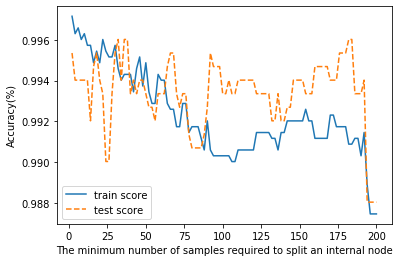

In [42]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth)

### 해석
- 학습 데이터셋 기반 정확도와 테스트 데이터셋 기반 정확도 간의 차이가 적은 분리 노드의 최소 자료 수 선정
- 분리 노드의 최소 자료 수가 클수록 분류 기준이 엄격해져 과대적합 방지가 용이함
- 테스트 데이터셋에서 모델 성능이 증가하다가 감소하기 직전인 최적의 분리 노드의 최소 자료 수 선정

In [43]:
n_split = 32

## 모델 최적화: (4) 잎사귀 노드의 최소 자료 수 선정

    min_samples_leaf  TrainScore  TestScore
0                  2       0.995      0.997
1                  4       0.994      0.995
2                  6       0.994      0.995
3                  8       0.993      0.994
4                 10       0.993      0.993
5                 12       0.993      0.992
6                 14       0.992      0.992
7                 16       0.993      0.992
8                 18       0.991      0.993
9                 20       0.988      0.990
10                22       0.989      0.991
11                24       0.989      0.993
12                26       0.993      0.994
13                28       0.990      0.991
14                30       0.988      0.988
15                32       0.987      0.988
16                34       0.988      0.987
17                36       0.987      0.986
18                38       0.986      0.986
19                40       0.987      0.988
20                42       0.987      0.988
21                44       0.988

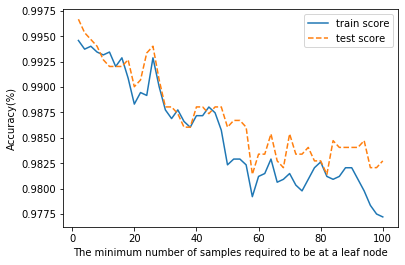

In [44]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

### 해석
- 학습 데이터셋 기반 정확도와 테스트 데이터셋 기반 정확도 간의 차이가 적은 잎사귀 노드의 최소 자료 수 선정
- 잎사귀 노드의 최소 자료 수가 클수록 분류 기준이 엄격해져 과대적합 방지가 용이함
- 테스트 데이터셋에서 모델 성능이 증가하다가 감소하기 직전인 최적의 잎사귀 노드의 최소 자료 수 선정

In [45]:
n_leaf = 26

## 최종 모델 학습


최종 모델 저장 완료! 파일 경로: ../model/wine_classification_RFC.pkl

Accuracy: 0.994
Precision: 0.993
Recall: 1.000
F1-score: 0.997


<Figure size 2160x2160 with 0 Axes>

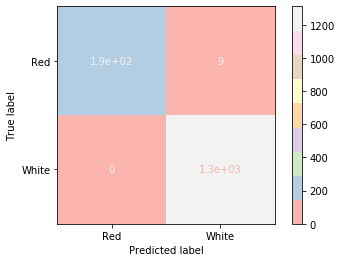

                 Feature  Importance
9   total sulfur dioxide       0.306
1              chlorides       0.255
10      volatile acidity       0.170
3                density       0.110
7         residual sugar       0.056
8              sulphates       0.041
6                     pH       0.029
5    free sulfur dioxide       0.015
4          fixed acidity       0.013
0                alcohol       0.004
2            citric acid       0.002


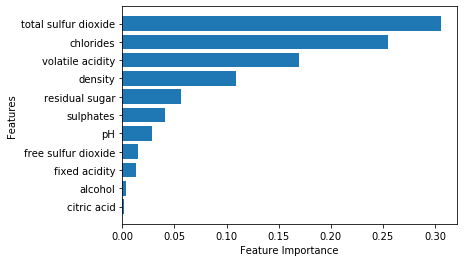

In [46]:
model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf)

### 해석
- 최종 학습한 모델의 정확도가 99.4%, F1 점수 역시 0.997인 만큼 분류 성능이 우수한 것을 알 수 있음
- 변수별 중요도 산출 결과, total sulfur dioxide(총 이산화황), chlorides(염화물), volatile acidity(휘발성산), density(밀도)가 와인 분류에 있어 가장 중요 4가지 변수임